# Convolutional Neural Networks for Produce Recognition
---

## Table of Contents
---
- [Our Team](#our-team)
- [Technologies Used](#technologies-used)
- [Datasets](#datasets)
- [Pre-Trained Models](#pre-trained-models)
- [Building a new Model](#building-a-new-model-(CNN))
- [Tuning Hyperparameters](#tuning-hyperparameters)
- [Data Preprocessing](#data-preprocessing)
- [Problems Encountered](#problems-encountered)
- [What's Next?](#what's-next?)
- [Integration](#integration)


## Our Team
---
- **Jeffrey Hsu**
- **Mandil Pradhan**
- **April Valdez**
- **Brent Hoover**

## Technologies Used
---
- Tensorflow
- Google Colab
- Python
- WandB
- Kaggle
- Jupyter Notebook

## Datasets
### Dataset Selection
---
- #### [Fruits and Vegetables Image Recognition Dataset](https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition)
- Images of fruits and vegetables extracted from [pexels.com](https://www.pexels.com), [stock.adobe.com](https://www.pexels.com), and [pixabay.com](https://www.pexels.com)
    - Merits:
      - High resolution images could capture more features in each class
      - Identifying multiple objects in an image would make it more realistic in a real world application where user's are taking pictures in a supermarket with a variety of foods in close proximity to each other<br><br>
      
    - Drawbacks:
      - High resolution images require more processing computational power
      - Images containing multiple objects make it difficult for the model to detect the class we want to identify and train; methods for overcoming this obstacle would be preprocessing the image using semantic segmentation
      - Models may be prone to overfitting<br><br>

- #### [Fruits 360](https://www.kaggle.com/datasets/moltean/fruits)
    - Merits:
      - Processing images faster since the images have lower resolutions and smaller dimensional sizes (100x100x3)
      - Less sensitive to noise and would avoid image preprocessing<br><br>
    - Drawbacks:
      - Difficult tesing high resolution images<br><br>


### Loading Datasets
---

#### Kaggle
Initially we download entire datasets onto our local machines to train our local models.

However, this raised several problems:

- Git versioning was a headache due to not having standardizing how and where we load from the dataset, which breaks local paths and creates hassles.
- It is incredibly inefficient to upload entire datasets up to cloud-based solutions for model training.

#### HuggingFace
For our later models, we solved these issues by loading and/or streaming the datasets remotely from HuggingFace.

This greatly streamlined our workflows, versioning, and allows easy setup on Google Colab.

In [2]:
# Installs and imports
try:
    from datasets import load_dataset
except ImportError:
    !pip install datasets
    from datasets import load_dataset

# Load the fruits-360 dataset
dataset = load_dataset("PedroSampaio/fruits-360")

In [3]:
# A look at the loaded dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 67690
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 22688
    })
})


## Pre-Trained Models
---
We started by testing the waters with pre-trained models.

Objectives:
- to get familiar with relevant technologies
- explore options for transfer learning


#### [Fruits Vegetables Classification Using CNN](https://www.kaggle.com/code/maimunulkjisan/fruits-vegetables-classification-using-cnn/notebook)
  - Uses the [Fruits and Vegetables Image Recognition Dataset](https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition), which contains training images, validation images, and test images with input sizes of (224, 224, 3)
  - Total of 36 classes, with approximately 70 to 100 training images and 9 to 10 validation images within each class for model training<br><br>

#### Accuracy and Loss

  ![](./notebooks/screenshots/fruit-veg-classification-model/accuracy-graph.png)
  ![](./notebooks/screenshots/fruit-veg-classification-model/loss-graph.png)
  
#### Predictions with Dataset Test Images  

  ![](./notebooks/screenshots/fruit-veg-classification-model/predictions-test-images.png)<br><br>

#### Predictions with Randomly Selected Images
  - Prior to testing, the selected images were resized and the dimensions expanded to (1, 224, 224, 3)<br><br>
  ![](./notebooks/screenshots/fruit-veg-classification-model/test-apples.png)<br><br>
  ![](./notebooks/screenshots/fruit-veg-classification-model/test-mult-carrots.png)<br><br>
  ![](./notebooks/screenshots/fruit-veg-classification-model/test-single-carrot.png)<br><br>
  - Despite the high accuracies and high number of corrected predictions from the dataset's test images, the model was unable to make accurate predictions when given an image from an external source.
  - Based on these inaccuracies, this model was not sufficient in accurately predicting a specific type of fruit or vegetable.
  - More importantly, we concluded that using this pre-trained model offers little in terms of flexibility and specificity.

## Building a new Model (CNN)

### Fruit-10
---

Fruit-10 is our first attempt at building and training a model from the ground up.
The result is a model that is functional, but the accuracy bears much to be desired.

- [Jupyter Notebook](./notebooks/Fruit_10.ipynb)

In [5]:
import tensorflow as tf

# model
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100,100,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=5, strides=3))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7372928   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [41]:
# cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

![](./notebooks/screenshots/fruit10/cnn-fitting.png)<br><br>

#### Results
![](./notebooks/screenshots/fruit10/accuracy-graph.png)
![](./notebooks/screenshots/fruit10/loss-graph.png)<br><br>

#### Predictions with Dataset Test Images 
- Out of the ten classes, only cauliflower, ginger root, red onion, and raspberry were consistently predicted correctly (4/10 classes)
- Rasberry classification is often predicted multiple times for not only the raspberry class, but for the red pepper and apple class as well. This could be due to the fact that these classes have a similar shape that is slightly spherical and elongated. Additionally, the violet raspberry color has a larger red RGB pixel value, which could be a similar pixel value to the red RGB channel for apples and red peppers.
- Ginger root classification was predicted on multiple instances with corn and banana, which could be a result of the shared yellow color, or the red and green RGB values
<br><br>
![](./notebooks/screenshots/fruit10/prediction1.png)<br><br>
![](./notebooks/screenshots/fruit10/prediction2.png)<br><br>

While the predictions are unreliable, this model is a working proof of concept. A lot of work were made to get the model functional.

### Fruit-10.v2
---

Once Fruit-10 is stablized and confirmed functional, we moved to experiment and attempt to improve on Fruit-10. We tried a variety of convolutional layer combinations in order to better learn how certain hyperparameters affect the model. 

Fruit-10.v2 is the final iteration of these rounds of experimentation. It is equipped with 3 convolutional layers, each with 2D max pooling. While the improvements over Fruit-10 varies over the course of these testings, we gained familiarity, knowledge, and some intuition about how each hyperparameter impact the model.

- [Jupyter Notebook](./notebooks/Fruit_10_v2.ipynb)

#### Results
Since the model is trained on a subset (70% or 700 images) of the dataset with only 4 epochs, the loss and accuracy are very jagged.

  ![](./notebooks/screenshots/ten_class_model_v2/accuracy.png) ![](./notebooks/screenshots/ten_class_model_v2/loss.png)
   <br></br>

#### Predictions with Dataset Test Images
The model is very successul with the test images from the dataset. One batch of the dataset (32 images) was used for testing.

  ![](./notebooks/screenshots/ten_class_model_v2/test_result.png)<br></br>

#### Predictions with Randomly Selected Images
  - Prior to testing, the selected images (handpicked via Internet seach) were resized and normalized to (100, 100, 3)<br><br>
     The results range from good:

  ![](./notebooks/screenshots/ten_class_model_v2/good_prediction.png) ![](./notebooks/screenshots/ten_class_model_v2/accurate_prediction.png) <br></br>
  
   To extremely off:

   ![](./notebooks/screenshots/ten_class_model_v2/unacceptable_prediction.png)

This model was great for practice and experimentation, but with such a small dataset, there is no way it could ever pass as an acceptable model.

### Fruit-113
---

The motivation for this model is to fully utilize the entire Fruits-360 dataset.

By streaming the dataset from HuggingFace instead of loading local files, we are also able to host the training on [Google Collab](https://colab.research.google.com/drive/1aEvH86QU1Xr2H80ELLNe08_9_J0ZrnIV?usp=sharing).


- [Jupyter Notebook](./notebooks/Fruit_113.ipynb)
- [Google Colab](https://colab.research.google.com/drive/1aEvH86QU1Xr2H80ELLNe08_9_J0ZrnIV?usp=sharing)

#### Predictions with Randomly Selected Images
![fruit-113 external image result](./notebooks/screenshots/fruit113/fruit113_BANANA.png)

#### Predictions with Dataset Test Images
![fruit113 on test dataset](./notebooks/screenshots/fruit113/fruit113_test.png)

Not much structural changes happened between Fruit-10 and Fruit-113.

However, we are now a lot more familiar with setting up a functional model with a supporting environment and modern tools to streamline future works on model construction.

## Tuning Hyperparameters

- [Jupyter Notebook](./notebooks/Fruit_113_WANDB.ipynb)
- [Google Colab](https://colab.research.google.com/drive/1rORQ2w0lOldQVcnqqlAzZfC770icciV6?usp=sharing)

So far, we have been optimizing the hyperparameters manually. This is a tedious and time-consuming process with results that are hard to interpret.

Therefore, we integrated **Weights and Biases** ([Wandb](wandb.io)) to streamline the hyperparameter process and — more importantly — generate valuable insights into how the hyperparameters affects the model's behavior.

#### What is a Sweep?
WandB "sweeps" a model by training it repeatedly with different combinations of hyperparameter values and logs a desired result (loss) against those configurations.

Here is a sweep that trained the model under 50 different hyperparameter configurations:
![A sweep of Fruit-113](./notebooks/screenshots/tuning-hyperparameters/fruits-113-sweep521.png)

This clearly shows that there is a very strong correlation between the learning rate and the resulting loss.

Although correlation is not the only metric to judge by, these sweeps are a great way to gain additional insights into how well the model respond to different hyperparameter configuations.

In [24]:
# The above sweep was generated using the following configuration in roughly 2 hours on Google Collab.
sweep_config = {
  "method": "random",
  "name": "sweep-113",
  "metric": {"goal": "minimize", "name": "loss"},

  "parameters": {
    "conv_layers": {'min': 16, 'max': 512}, 
    "conv_layers2": {'min': 16, 'max': 512}, 
    "dense_layers": {'min': 256, 'max': 1024}, 
    'learning_rate': {'min': 0.0001, 'max': 0.012},
  }
}

Here is a very simple sweep that very clearly shows the optimal configuration out of a set of hyperparameter values to minimize loss.
![Another sweep being done for a dense layer](./notebooks/screenshots/tuning-hyperparameters/fruits-113-sweep538.png)

Please follow [this link](https://colab.research.google.com/drive/1rORQ2w0lOldQVcnqqlAzZfC770icciV6?usp=sharing) to a notebook hosted on Google Collab to see how we integrated WandB into our model training. You can even run a few sweeps with your own hyperparameter configurations!

## Data Preprocessing

#### Data Augmentation
Geometric transformations to increase the dataset.

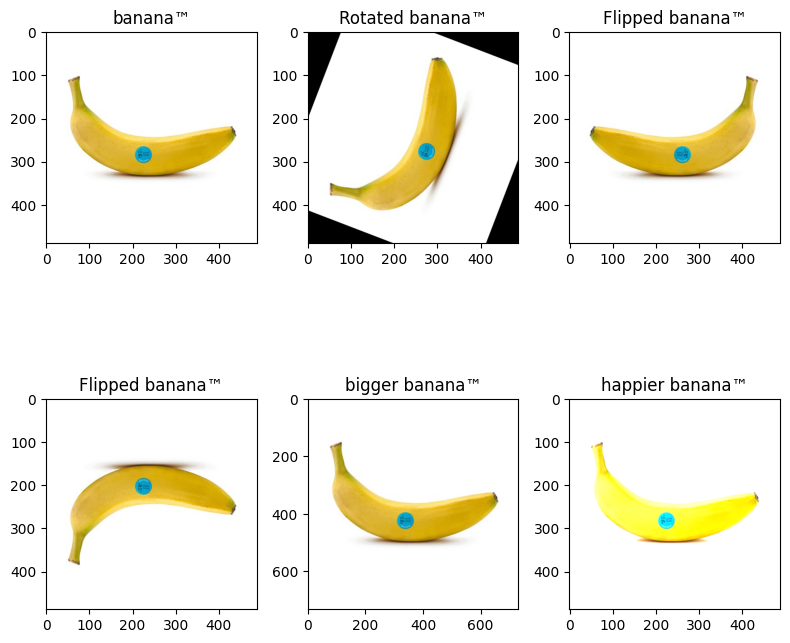

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load the banana™
image = cv2.imread("./notebooks/res/banana.jpg")

# Show the banana™
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("banana™")

# Rotate the banana™
rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D((image.shape[1] // 2, image.shape[0] // 2), 69, 1.0), (image.shape[1], image.shape[0]))
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated banana™")

# Horizontally flipping the banana™
flipped_horizontal_image = cv2.flip(image, 1)
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(flipped_horizontal_image, cv2.COLOR_BGR2RGB))
plt.title("Flipped banana™")

# Vertically flipping the banana™
flipped_vertical_image = cv2.flip(image, 0)
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(flipped_vertical_image, cv2.COLOR_BGR2RGB))
plt.title("Flipped banana™")

# Scale the banana™
scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title("bigger banana™")

# Brighten up the banana™
brightness_factor = 1.5
brightness_adjusted_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(brightness_adjusted_image, cv2.COLOR_BGR2RGB))
plt.title("happier banana™")

# Display all the banana™
plt.tight_layout()
plt.show()


## Problems Encountered
No Average Banana Face
- We attempted to approach the task of this project using classical computer vision techniques taught in class. However, we quickly realized that most of the techniques we were interested in and considered are ill-equipped to handle the amount of classes we are targetting.

Questionable Cucumber
- Some initial datasets that we used had a few bad apples strewn throughout that really threw us off during training and testing. We believe that they threw the model off as well.

How many programmers does it take to change a light bulb?
None, that's a hardware problem!
- We had to finangle with a lot of hardware compatibility issues. There were numerous esoteric version issues when exploring established projects and models. Tensorflow in particular does not play nice with Apple silicon. Even our Windows devices were running against hard issues.

Image file formats
- Images can be represented in so many different formats. Due to our experimental approaches to testing out various implementations and processing, it was a tedious task to keep all the different formats straight. There were a couple of instances where we were roadblocked and misdiagnosed our models just because we loaded our models with incompatible (but not error-throwing!) formats.

## What's Next?

We spent some considerable amount of time trying to get more complex models working as well.

One of the first issue we tackled was on how to detect food in busy and crowded images, such as an apple in a pile of groceries at HEB.

We researched various models that can address this problem very neatly. We dived into RCNN (and its fast, faster cousins). We learned the difference between semantic and instance segmentation and how the latter fits our use case perfectly.

We have implemented a functional model utilizing transfer learning from a pre-trained model, enabling object detection capabilities. However, it currently exhibits shortcomings in accuracy and has identified flaws. Additional insights into these aspects are provided in the following section.

## Integration


We aim to integrate the concept of fruit and vegetable classification into our Recipe Generator application. To achieve real-time object detection, it is essential to employ a model capable of detecting specific objects within a frame, as opposed to a traditional image classification approach that focuses on labeling entire images.

Within the constraints of the given time frame, we successfully applied transfer learning to the SSD-EfficientDet 512x512 model, pre-trained on the COCO dataset. While we made notable progress, further enhancements are imperative. Specifically, the model requires more meticulous data labeling for improved efficiency, and adjustments to parameters are necessary to mitigate overfitting, thereby augmenting the accuracy of predictions.


## Current Status of Object detection

As depicted in the image below, the model demonstrates the ability to detect multiple objects, albeit with a limitation—it excels primarily in recognizing objects closely related to those it was trained on. To enhance its performance, the model requires further refinement and parameter tuning to achieve superior accuracy.
<div style="display: flex; justify-content: space-between;">
    <img src="./notebooks\screenshots\object-detection-model\detection_output0.png" alt="Image 1" style="width: 50%;">
    <img src="./notebooks\screenshots\object-detection-model\detection_output1.png" alt="Image 2" style="width: 50%;">
</div>
<div style="display: flex; justify-content: space-between;">
    <img src="./notebooks\screenshots\object-detection-model\detection_output4.png" alt="Image 1" style="width: 50%;">
    <img src="./notebooks\screenshots\object-detection-model\detection_output3.png" alt="Image 2" style="width: 50%;">
</div>


## Data visualization

The following data is derived from Tensorboard training data events.
![image.png](./notebooks\screenshots\object-detection-model\loss_data.png)